In [26]:
import math
import numpy as np
import pandas as pd

# aeon

In [6]:
# https://www.aeon-toolkit.org/en/stable/examples/distances/distances.html
import warnings



from aeon.distances import dtw_distance as aeon_dtw, euclidean_distance as aeon_ed

warnings.filterwarnings("ignore")
a = np.array([1, 2, 3, 4, 5, 6])  # Univariate as 1D
b = np.array([2, 3, 4, 5, 6, 7])
d1 = aeon_ed(a, b)
d2 = aeon_dtw(a, b)
print(f" ED 1 = {d1} DTW 1 = {d2}")

 ED 1 = 2.449489742783178 DTW 1 = 2.0


In [7]:
# https://www.aeon-toolkit.org/en/stable/api_reference/auto_generated/aeon.distances.dtw_cost_matrix.html
from aeon.distances import dtw_cost_matrix
m = dtw_cost_matrix(a, b)
m

array([[ 1.,  5., 14., 30., 55., 91.],
       [ 1.,  2.,  6., 15., 31., 56.],
       [ 2.,  1.,  2.,  6., 15., 31.],
       [ 6.,  2.,  1.,  2.,  6., 15.],
       [15.,  6.,  2.,  1.,  2.,  6.],
       [31., 15.,  6.,  2.,  1.,  2.]])

In [8]:
# https://www.askpython.com/python/array/reverse-an-array-in-python
np.flipud(m)


array([[31., 15.,  6.,  2.,  1.,  2.],
       [15.,  6.,  2.,  1.,  2.,  6.],
       [ 6.,  2.,  1.,  2.,  6., 15.],
       [ 2.,  1.,  2.,  6., 15., 31.],
       [ 1.,  2.,  6., 15., 31., 56.],
       [ 1.,  5., 14., 30., 55., 91.]])

# dtaidistance

In [16]:
from dtaidistance.dtw import distance as dtaidistance_dtw
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance = dtaidistance_dtw(s1, s2)
print(distance)

1.4142135623730951


In [36]:
from dtaidistance.dtw import distance_fast as dtaidistance_dtw_fast
import numpy as np
s1 = np.array([0.0, 0, 1, 2, 1, 0, 1, 0, 0])
s2 = np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0])
dist = dtaidistance_dtw_fast(s1, s2)
dist



1.4142135623730951

In [38]:
dtaidistance_dtw_fast(q, c)

127.00618219754601

In [53]:
from dtaidistance import dtw
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance = dtw.distance(s1, s2)
print(distance)
s1 = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0]) 
s2 = np.array([0, 1, 2, 0, 0, 0, 0, 0, 0]) 
print(dtw_distance(s1, s2))

1.4142135623730951
2.0


# sktime

In [42]:
from sktime.distances import dtw_distance as sktime_dtw

In [43]:
sktime_dtw(q, c)

16130.570316396252

In [44]:
sktime_dtw(q, c[:len(q)])

72896.27205022328

In [22]:
manual_calculation = (1-5)**2 + (2-5)**2 + (3-5)**2 + (4-6)**2 + (4-7)**2 + (4-8)**2 
manual_calculation, math.sqrt(manual_calculation)

(58, 7.615773105863909)

In [30]:
c_x1 = np.linspace(0, 4 * np.pi, 100)
c_y1 = np.sin(c_x1) * 50 + 50  # Scale to range around 0~100
c_x2 = np.linspace(0, 1, 20)
c_y2 = np.piecewise(c_x2, [c_x2 < 0.5, c_x2 >= 0.5], [lambda x: 2*x, lambda x: 2*(1-x)])
c_y2 = c_y2 * 50  # Scale it similarly
offset = c_y1[-1] - c_y2[0]
c_y2 = c_y2 + offset
c = np.concatenate([c_y1, c_y2])
q_x = np.linspace(0, 4 * np.pi, 70)
q = np.sin(q_x) * 50 + 50  # Scale to range around 0~100


# pyts

In [ ]:
from pyts.metrics import dtw as pyts_dtw
import warnings
warnings.simplefilter("ignore", FutureWarning) # pyts.metrics.dtw returns a FutureWarning
x = [0, 1, 1]
y = [2, 0, 1]
pyts_dtw(x, y, method='sakoechiba', options={'window_size': 0.5})

2.0

In [ ]:
ts1 = np.array([1, 2, 3, 4])
ts2 = np.array([5, 6, 6, 7, 8])
x = [0, 1, 1]
y = [2, 0, 1]
pyts_dtw(ts1, ts2, method='sakoechiba', options={'window_size': 0.1})


8.12403840463596

In [ ]:
pyts_dtw(ts1, ts2)

7.874007874011811

# tslearn

In [54]:
from tslearn.metrics import dtw, dtw_path
import numpy as np

# Sample time series
ts1 = np.array([1, 2, 3, 4])
ts2 = np.array([5, 6, 6, 7, 8])
# ts1 = np.array([1, 1, 1, 1, 2, 2, 2, 3, 3])
# ts2 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 4, 4, 4])

# Define Sakoe-Chiba radius (r)
r = 0

# Compute DTW path and distance with Sakoe-Chiba constraint
path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=r)
path2, dist2 = dtw_path(ts1, ts2)

# Print results
print("DTW distance:", dist, path)
print("Warping path:", dist2, path2)


DTW distance: 8.12403840463596 [(0, 0), (1, 1), (2, 2), (3, 3), (3, 4)]
Warping path: 7.874007874011811 [(0, 0), (1, 0), (2, 0), (3, 1), (3, 2), (3, 3), (3, 4)]


# Distance Matrix

dtw_sakoechiba: 11.0
dtw_itakura: 11.40175425099138


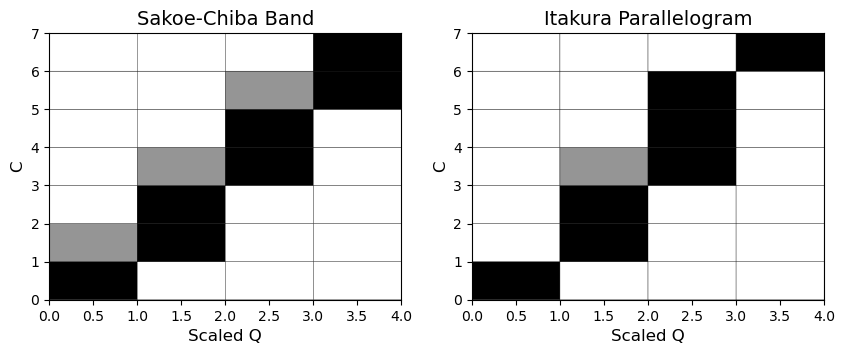

In [56]:
# x = q_scaled[:50]
# y = c[:50]
# x = q_scaled[:50]
# y = c[:50]
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 6, 7, 8, 8, 8])

# https://pyts.readthedocs.io/en/stable/auto_examples/metrics/plot_dtw.html
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.metrics import dtw, itakura_parallelogram, sakoe_chiba_band
from pyts.metrics.dtw import (cost_matrix, accumulated_cost_matrix,
                              _return_path, _blurred_path_region)

# Parameters
# X, _, _, _ = load_gunpoint(return_X_y=True)
# x, y = X[0], X[1]
# To compare time series of different lengths, we remove some observations
# mask = np.ones(x.size)
# mask[::5] = 0
# y = y[mask.astype(bool)]
n_timestamps_1, n_timestamps_2 = x.size, y.size

plt.figure(figsize=(10, 8))
timestamps_1 = np.arange(n_timestamps_1 + 1)
timestamps_2 = np.arange(n_timestamps_2 + 1)

# Dynamic Time Warping: sakoechiba
# window_size = 0.1
window_size = 0.1

dtw_sakoechiba, path_sakoechiba = dtw(
    x, y, dist='square', method='sakoechiba',
    options={'window_size': window_size}, return_path=True
)
band = sakoe_chiba_band(n_timestamps_1, n_timestamps_2,
                        window_size=window_size)
matrix_sakoechiba = np.zeros((n_timestamps_1, n_timestamps_2))
for i in range(n_timestamps_1):
    matrix_sakoechiba[i, np.arange(*band[:, i])] = 0.5
matrix_sakoechiba[tuple(path_sakoechiba)] = 1.

plt.subplot(2, 2, 1)
plt.pcolor(timestamps_1, timestamps_2, matrix_sakoechiba.T,
           edgecolors='k', cmap='Greys')
plt.xlabel('Scaled Q', fontsize=12)
plt.ylabel('C', fontsize=12)
plt.title('Sakoe-Chiba Band', fontsize=14)
print("dtw_sakoechiba:", dtw_sakoechiba)

# Dynamic Time Warping: itakura
slope = 1.2
dtw_itakura, path_itakura = dtw(
    x, y, dist='square', method='itakura',
    options={'max_slope': slope}, return_path=True
)
parallelogram = itakura_parallelogram(n_timestamps_1, n_timestamps_2,
                                      max_slope=slope)
matrix_itakura = np.zeros((n_timestamps_1, n_timestamps_2))
for i in range(n_timestamps_1):
    matrix_itakura[i, np.arange(*parallelogram[:, i])] = 0.5
matrix_itakura[tuple(path_itakura)] = 1.
plt.subplot(2, 2, 2)
plt.pcolor(timestamps_1, timestamps_2, matrix_itakura.T,
           edgecolors='k', cmap='Greys')
plt.xlabel('Scaled Q', fontsize=12)
plt.ylabel('C', fontsize=12)
plt.title("Itakura Parallelogram",
          fontsize=14)
print("dtw_itakura:", dtw_itakura)

# plt.suptitle("Dynamic Time Warping", y=0.995, fontsize=17)
plt.subplots_adjust(top=0.91, hspace=0.4)
# plt.grid(False)
plt.savefig("../figures/dtw-matrix.pdf", format="pdf", bbox_inches="tight")
plt.show()
